# Clustering

## K-means clustering

$$ J(r, \mu) = \sum_i^N\sum_i^Kr_{ik}||x_i-u_k||_2^2$$

In [5]:
import numpy as np
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'K=4, J=27.99')

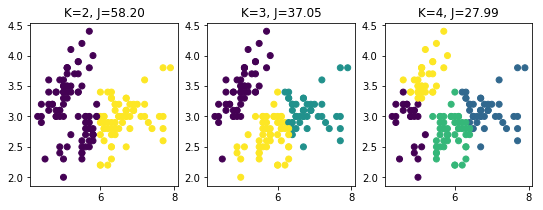

In [6]:
iris = datasets.load_iris()
X = iris.data[:, :2] # use only 'sepal length and sepal width'
y_iris = iris.target

km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)

## Heirarchical clustering

Text(0.5, 1.0, 'K=4')

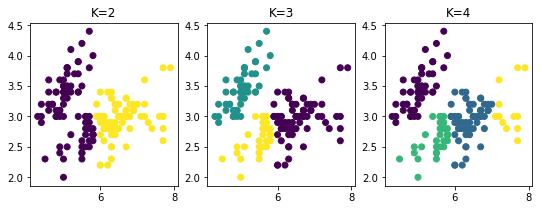

In [7]:
ward2 = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
ward3 = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
ward4 = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=ward2.labels_)
plt.title("K=2")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=ward3.labels_)
plt.title("K=3")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=ward4.labels_)
plt.title("K=4")

## Gaussian mixture models

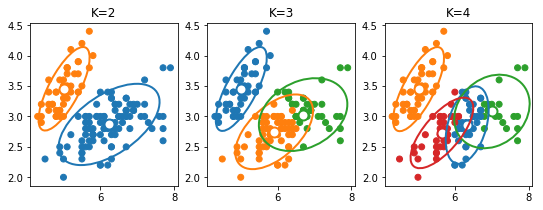

In [8]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns # nice color
import sklearn
from sklearn.mixture import GaussianMixture
import plot_utils

colors = sns.color_palette()
iris = datasets.load_iris()
X = iris.data[:, :2] # 'sepal length (cm)''sepal width (cm)'
y_iris = iris.target
gmm2 = GaussianMixture(n_components=2, covariance_type='full').fit(X)
gmm3 = GaussianMixture(n_components=3, covariance_type='full').fit(X)
gmm4 = GaussianMixture(n_components=4, covariance_type='full').fit(X)
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm2.predict(X)])
for i in range(gmm2.covariances_.shape[0]): 
    plot_utils.plot_cov_ellipse(cov=gmm2.covariances_[i, :], pos=gmm2.means_[i, :], 
                                          facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm2.means_[i, 0], gmm2.means_[i, 1], edgecolor=colors[i], 
                marker="o", s=100, facecolor="w", linewidth=2)
plt.title("K=2")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm3.predict(X)])
for i in range(gmm3.covariances_.shape[0]):
    plot_utils.plot_cov_ellipse(cov=gmm3.covariances_[i, :], pos=gmm3.means_[i, :],
                                          facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm3.means_[i, 0], gmm3.means_[i, 1], edgecolor=colors[i], 
                marker="o", s=100, facecolor="w", linewidth=2)
plt.title("K=3")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm4.predict(X)])
for i in range(gmm4.covariances_.shape[0]):
    plot_utils.plot_cov_ellipse(cov=gmm4.covariances_[i, :], pos=gmm4.means_[i, :], 
                                          facecolor='none', linewidth=2, edgecolor=colors[i])
    plt.scatter(gmm4.means_[i, 0], gmm4.means_[i, 1], edgecolor=colors[i], 
                marker="o", s=100, facecolor="w", linewidth=2)
_ = plt.title("K=4")

## Model selection

Choose k= 2


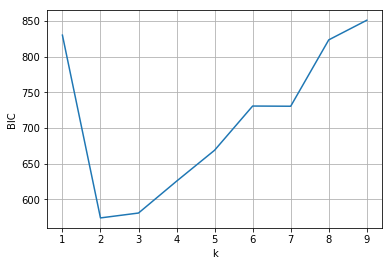

In [9]:
X = iris.data
y_iris = iris.target
bic = list()

ks = np.arange(1, 10)
for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(X)
    bic.append(gmm.bic(X))
k_chosen = ks[np.argmin(bic)]
plt.plot(ks, bic)
plt.xlabel("k")
plt.ylabel("BIC")
plt.grid(True)
print("Choose k=", k_chosen)